### Auto Encoder
- 비지도학습 딥러닝 모델
- 입력값을 압축시킨 후 다시 압축된 정보를 복원해서 입력값과 동일출력값으로 학습되는 모델
- 학습 과정을 통해 최대한 입력값과 출력값이 일치되도록 모델 파라미터가 최적화됨.
- 오토 인코더의 압축된 정보는 입력값에서 노이즈가 제거된 핵심 특징들로 구성된 저차원 데이터로 간주되어 주로 차원축소의 목적으로 활용됨.

In [69]:
from IPython.display import Image
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder1.png", width=500, height=100)

In [70]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [71]:
# (x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [72]:
converse1 = pd.read_csv("../DL_Project/Data/converse_1.csv")
converse3 = pd.read_csv("../DL_Project/Data/Shoew_Added/converse3.csv")

In [73]:
data = pd.concat([converse1,converse3])

In [74]:
data

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
train_data, test_data = train_test_split(data,random_state=42)

In [80]:
train_data = np.array(train_data,dtype=np.int32).reshape(-1,128,128,3)
test_data = np.array(test_data,dtype=np.int32).reshape(-1,128,128,3)

In [81]:
print(train_data.shape)
print(test_data.shape)

(90, 128, 128, 3)
(30, 128, 128, 3)


In [83]:
# data 정규화
train_data = train_data.astype('float32')/255
test_data = test_data.astype('float32')/255

train_data = train_data.reshape((len(train_data),128*128*3))
test_data = test_data.reshape((len(test_data),128*128*3))

# Tensorflow Model 생성

In [87]:
InputModel = keras.layers.Input(shape=(128*128*3))

In [88]:
InputModel.shape

TensorShape([None, 49152])

In [89]:
# EncoderLayer는 3차원으로 축소된 입력값
EncodedLayer = keras.layers.Dense(32,activation='relu')(InputModel)
# DecoderLayer는 MNIST차원으로 복원된 값
DecoderLayer = keras.layers.Dense(128*128*3, activation='sigmoid')(EncodedLayer)
# AuroEncoderModel은 입력값과 복원값을 최소화하는 과정
AutoEncoderModel = keras.models.Model(InputModel,DecoderLayer)
AutoEncoderModel.compile(optimizer='adam',loss='binary_crossentropy')

In [90]:
history = AutoEncoderModel.fit(train_data,train_data,batch_size=256,epochs=50,shuffle=True)

Epoch 1/50
1/1 [==============================] - 1s 520ms/step - loss: 0.6931
Epoch 2/50
1/1 [==============================] - 0s 60ms/step - loss: 0.6928
Epoch 3/50
1/1 [==============================] - 0s 59ms/step - loss: 0.6924
Epoch 4/50
1/1 [==============================] - 0s 53ms/step - loss: 0.6919
Epoch 5/50
1/1 [==============================] - 0s 207ms/step - loss: 0.6915
Epoch 6/50
1/1 [==============================] - 0s 174ms/step - loss: 0.6911
Epoch 7/50
1/1 [==============================] - 0s 80ms/step - loss: 0.6906
Epoch 8/50
1/1 [==============================] - 0s 82ms/step - loss: 0.6902
Epoch 9/50
1/1 [==============================] - 0s 105ms/step - loss: 0.6897
Epoch 10/50
1/1 [==============================] - 0s 75ms/step - loss: 0.6892
Epoch 11/50
1/1 [==============================] - 0s 100ms/step - loss: 0.6888
Epoch 12/50
1/1 [==============================] - 0s 74ms/step - loss: 0.6883
Epoch 13/50
1/1 [==============================] - 0s 59

In [91]:
DecodedDigits = AutoEncoderModel.predict(test_data)

1/1 [==============================] - 0s 53ms/step


In [92]:
# x_test와 DecodedDigits의 크기
print(test_data.shape)
print(DecodedDigits.shape)

(30, 49152)
(30, 49152)


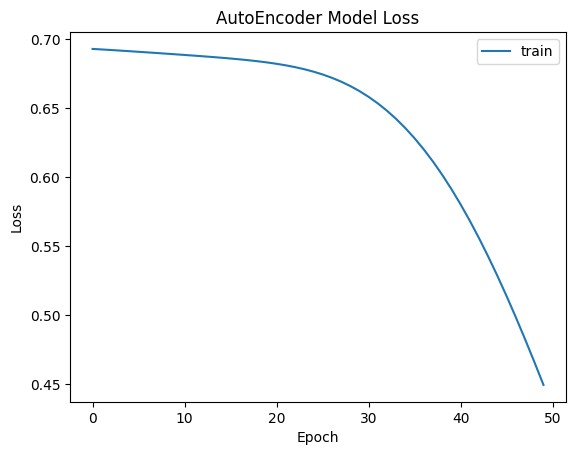

In [93]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('AutoEncoder Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
plt.show()

NameError: name 'x_test' is not defined

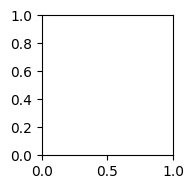

In [94]:
# 10개의 이미지를 시각화
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
# ------------------------------
    ax= plt.subplot(2,n,i+1+n)
    plt.imshow(DecodedDigits[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()